K-NN 분류기 (Iris 데이터 셋)

In [2]:
from sklearn import datasets

# Iris 데이터 불러오기
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
# dictionary 키값 확인
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [4]:
# X변수 명 확인
# iris.feature_names
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
# sepal length 와  sepal width 2개변수를 설명변수로 선택
X = iris.data[:, :2]  
y = iris.target  

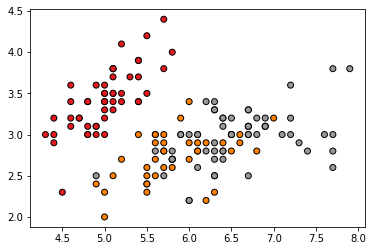

In [6]:
# 데이터 가시화
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score

# 트레이닝 셋: 테스팅 셋 = 75 : 25
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=30)

# 모델링, k=5 (default)
KNN_MODEL = KNeighborsClassifier()
KNN_MODEL.fit(x_train, y_train)
prediction = KNN_MODEL.predict(x_test)

#예측 정확도
print("Training error       : {0:.3f}".format(KNN_MODEL.score(x_train, y_train)))
print("Testing error        : {0:.3f}".format((prediction==y_test).mean()))


# 10 cross-validation 모델링 및 예측정확도
print("cross_val_score      : {0:.3f}".format(cross_val_score(KNN_MODEL, X, y, cv=10).mean()))

Training error       : 0.830
Testing error        : 0.763
cross_val_score      : 0.747


In [8]:
# 최적의 K 찾기

train_acc = []
test_acc = []

for n in range(1,15):
    KNN_MODEL = KNeighborsClassifier(n_neighbors=n)
    KNN_MODEL.fit(x_train, y_train)
    prediction = KNN_MODEL.predict(x_test)
    train_acc.append(KNN_MODEL.score(x_train, y_train))
    test_acc.append((prediction==y_test).mean())

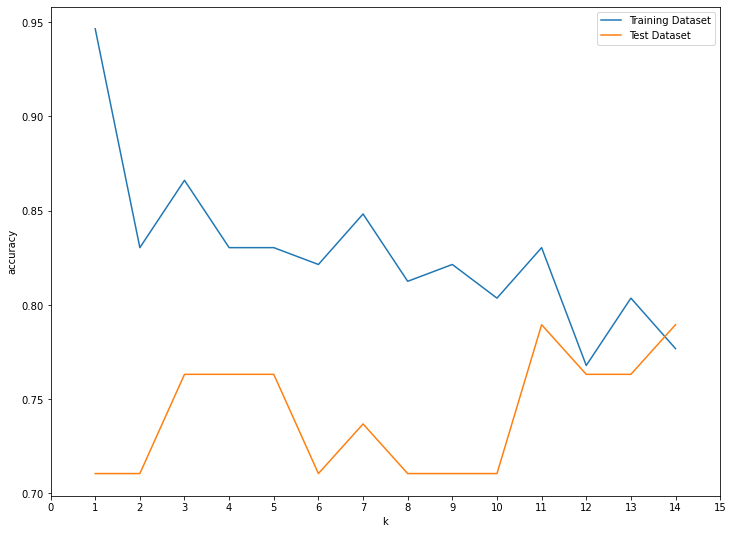

In [9]:
# K에 따른 Training dataset 과 Test dataset의 Accuracy 가시화

import numpy as np
plt.figure(figsize=(12, 9))
plt.plot(range(1, 15), train_acc, label='Training Dataset')
plt.plot(range(1, 15), test_acc, label='Test Dataset')
plt.xlabel("k")
plt.ylabel("accuracy")
plt.xticks(np.arange(0, 16, step=1))
plt.legend()